# 인공지능 과제 \#2

BMI와 혈당에 대한 선형 회귀 문제를 numpy를 사용하여 풀이하시오.

코랩으로 풀이하여, 링크를 업로드할 것.

## 데이터 다운로드 코드

In [1]:
import numpy as np
from sklearn import datasets
X, y = datasets.load_diabetes(return_X_y=True)
X_new = X[:, np.newaxis, 2]

In [2]:
print(X_new.shape)
print(X.shape)

(442, 1)
(442, 10)


## (유틸리티 정의)

**`show_results`**

In [3]:
from matplotlib import pyplot as plt

def show_results(X_train, y_train, X_test, y_test, y_pred):
  plt.scatter(X_train, y_train, color='black')
  plt.scatter(X_test, y_test, color='red')
  y_pred = model.predict(X_test)

  plt.plot(X_test, y_pred, 'b-')
  plt.show()

## 답안 \#1: (함수 가공) 클래스 정의 및 선형회귀 구현, 인터페이스 유지

**`sklearn.linear_model.LinearRegression`의 사용 케이스**

```py
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
```
**구현 대상**
* `LinearRegression`
* `LinearRegression.fit(x, y)`
* `LinearRegression.predict(x)` -> `numpy.ndarray`

**주의 사항**
* `LinearRegression.fit` 및 `LinearRegression.predict`의 `x` 인자는 $n \times m$ 행렬을 받는 것을 기대함.
  * $y = WX_1 + b$ 수식의 차원을 확장해야함  
    ($X$ 는 $N \times 1$ 행렬)
  * $y = W_1 X_1 + W_2 X_2 + ... + W_M X_M + b$로 확장


### 구현체 정의

In [4]:
class LinearRegression:
  def __init__(self):
    try:
      np
    except NameError:
      import numpy as np

    self._init_fields()

  def _init_fields(self):
    self.W: np.ndarray = np.ndarray((1))
    self.b: float = 0
    self.lrate: float = 0.01
    self.epochs: int = 1000

  @property
  def coef_(self) -> list[float]:
    return [self.W]

  @property
  def intercept_(self) -> float:
    return self.b

  def fit(self, X: np.ndarray, y: np.ndarray):
    # Raise exceptions
    if X.shape[0] != y.shape[0]:
      raise ValueError('Found input variables with inconsistent numbers of samples')
    if len(X.shape) > 2:
      raise ValueError('More than 3-dimension input cannot be computed.')

    # Initializing
    self._init_fields()
    self.W = np.ndarray(X.shape[1])
    dW = np.ndarray((X.shape[1]))
    n = float(X.shape[0])

    for i in range(X.shape[1]):
      each_column = X[:, i]

    # Fitting
    for i in range(self.epochs):
      y_pred = self.b
      for j in range(X.shape[1]):
        each_column = X[:, j]
        y_pred += self.W[j] * each_column
        dW[j] = (2 / n) * sum(each_column * (y_pred - y))
      db = (2 / n) * sum(y_pred - y)

      for j in range(X.shape[1]):
        self.W[j] -= self.lrate * dW[j]
      self.b -= self.lrate * db

  def predict(self, x) -> np.ndarray:
    result = np.ndarray((x.shape[0]))
    result.fill(self.b)
    for i in range(x.shape[1]):
      result += self.W[i] * x[:, i]
    return result

### 구현체 사용

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=.1, random_state=0)

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

In [7]:
print(f'Weight: {model.coef_}')
print(f'Bias: {model.intercept_}')
y_pred = model.predict(X_test)

Weight: [array([43.31295047])]
Bias: 150.77740762926052


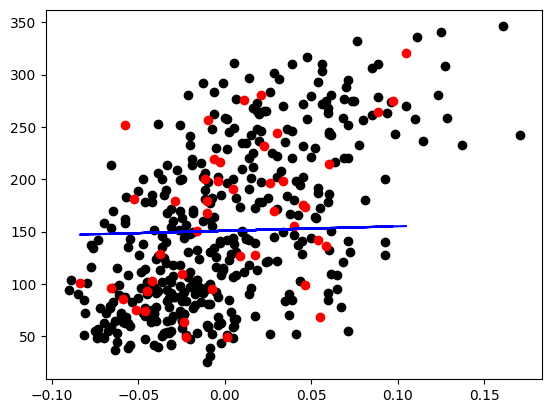

In [8]:
show_results(X_train, y_train, X_test, y_test, y_pred) # 사전 정의한 유틸리티 사용

## 답안 \#2: (입력 가공) Chapter 04 수업 중의 수식과 호환되는 포맷으로 입력 조정

* 1차원 입력에 대해서만 대응해야함

In [9]:
class LinearRegression_1D:
  def __init__(self):
    self._init_fields()

  def _init_fields(self):
    self.W = 0
    self.b = 0
    self.lrate = .01
    self.epochs = 1000

  def fit(self, X, y):
    n = float(len(X))

    for i in range(self.epochs):
      y_pred = self.W * X + self.b

      dW = (2 / n) * sum(X * (y_pred - y))
      db = (2 / n) * sum(y_pred - y)

      self.W -= self.lrate * dW
      self.b -= self.lrate * db

  def predict(self, X):
    return self.W * X + self.b

In [10]:
model = LinearRegression_1D()
X, y = datasets.load_diabetes(return_X_y=True)
X = X[:, 2]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=0)
model.fit(X_train, y_train)

In [11]:
print(model.W, model.b)
y_pred = model.predict(X_test)

43.31295046941632 150.77740762926052


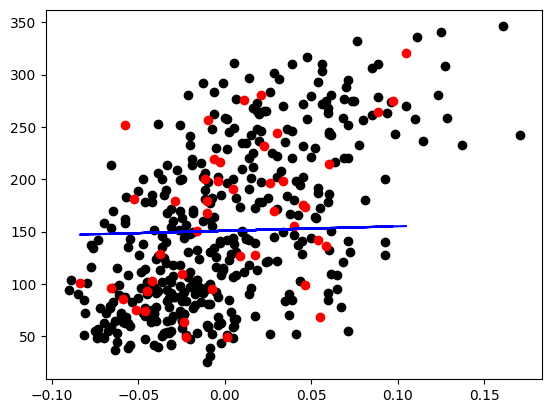

In [12]:
show_results(X_train, y_train, X_test, y_test, y_pred) # (사전 정의한 유틸리티 사용)

## `sklearn.linear_model.LinearRegression` 과의 비교

[참고: `LinearRegression`의 정의](https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/linear_model/_base.py#L434)

In [13]:
from sklearn.linear_model import LinearRegression as LinearRegression_sklearn
X, y = datasets.load_diabetes(return_X_y=True)
X_new = X[:, np.newaxis, 2]
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=.1, random_state=0)

model = LinearRegression_sklearn()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
print(f'Weight: {model.coef_}')
print(f'Bias: {model.intercept_}')
y_pred = model.predict(X_test)

Weight: [966.7269242]
Bias: 151.20933147606175


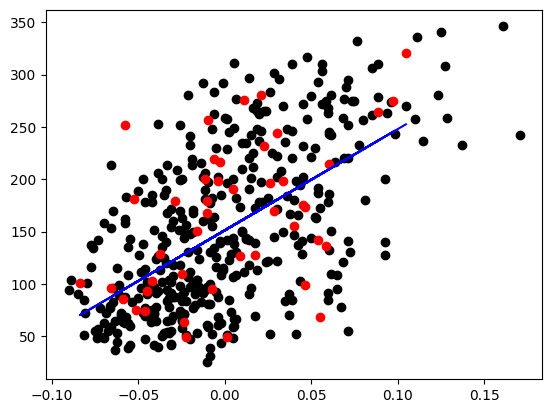

In [15]:
show_results(X_train, y_train, X_test, y_test, y_pred) # (사전 정의한 유틸리티 사용)

**주요 파라미터 요약**  

| 항목 | $W$ | $b$ |
| :-: | :-: | :-: |
| 답안 #1 | 43.31295047 | 150.77740762926052 |
| 답안 #2 | 43.31295046941632 | 150.77740762926052 |
| `sklearn.linear_model.LinearRegression` | 966.7269242 | 151.20933147606175 |